### In this notebook we will learn:

* Getting Data: How to import data from PyCaret repository
* Setting up the sqlite database: To store the model artifacts, it is important to have a persistent database through sqlite.
* Setting up Environment: How to setup an experiment in PyCaret and get started with building classification models
* Create & Compare Models: How to create and compare various models, perform stratified cross validation and evaluate classification metrics
* Tune Model: How to automatically tune the hyper-parameters of a classification model
* Custom Tuning: How to manually change the searching strategy for hyperparameter tuning
* Ensemble Models: How to create ensemble of best performing models to improve the performance
* Plot Model: How to analyze model performance using various plots
* Finalize Model: How to finalize the best model at the end of the experiment
* Predict Model: How to make predictions on new / unseen data
* Save / Load Model: How to save / load a model for future use

In [1]:
#make sure your path is set to source folder
%cd /home/
#make sure your path is set to source folder

/home


In [2]:
!pwd

/home


## Loading Data 

### 1.1 Importing packages

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import utils
from pycaret.classification import *
# Other Libraries
import mlflow

In [4]:
# Setting up all directory
root_folder = "/home/"

data_directory = root_folder+"data/raw/"
data_profile_path = root_folder+"/data/profile_report/"
intermediate_data_path = root_folder+"data/interim/"
final_processed_data_path = root_folder+"data/processed/"
database_path = root_folder+"database/"
print("directory loaded")

directory loaded


In [5]:
#!pip install pycaret==2.3.8

 ### 1.2 Reading Data

In [6]:
%%time
final_data = "final_train_data_process_1660309884.csv" # set the data recieved from the previous notebook
dataset = utils.load_data( [f"{final_processed_data_path}{final_data}",
                            ]
                         )[0] #since we are only loading single data, we can access it with index 0, since it return multiple dfs in list
dataset.shape

CPU times: user 1.07 s, sys: 191 ms, total: 1.26 s
Wall time: 1.26 s


(324000, 37)

In [7]:
dataset.head()

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,total_payment_channels,change_in_payment_methods,payment_plan_days_mean,change_in_plan,plan_list_price_mean,actual_amount_paid_mean,is_auto_renew_mean,is_autorenew_change_flag,transaction_date_min,transaction_date_max,total_transactions,membership_expire_date_max,is_cancel_mean,is_cancel_change_flag,discount_mean,is_discount_mean,is_discount_max,amt_per_day_mean,membership_duration_mean,more_than_30_sum,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,login_freq,last_login,registration_duration
0,/7XuYVGXYHPggWsdtok0JEurQ10CtUO1Y8dDgy1/B0M=,1,6.3,2,7,2016-12-23,0,3,1,30.0,1,149.0,149.0,1.0,1,2016-12-23,2017-02-22,3,2017-03-22,0.0,0,0.0,0.0,0,4.966667,29.666667,1,0.000000,0.000000,0.0,0.000000,2.289867,2.289867,7.810,4,2017-02-14,89
1,gB3/kawEQSauWFArU9Z0kZo+ikw9GqJv0rXqNbpVnTY=,1,6.3,2,7,2016-12-23,0,3,1,30.0,1,99.0,99.0,1.0,1,2016-12-23,2017-02-23,3,2017-03-23,0.0,0,0.0,0.0,0,3.300000,30.000000,2,0.274653,0.000000,0.0,0.000000,2.845647,2.281930,8.360,4,2017-02-22,90
2,2aFAPs3QmxD+bNcCe8beuWcI7SZHg1k+1irALOxiw3k=,15,23.0,1,4,2016-12-24,0,3,1,30.0,1,149.0,149.0,1.0,1,2016-12-27,2017-02-27,3,2017-03-26,0.0,0,0.0,0.0,0,4.966667,29.000000,0,0.000000,0.000000,0.0,0.000000,4.708342,4.683700,10.234,4,2017-01-16,92
3,FjEZAhwFky8sWoaNGTp+p/r3/hH30WxLr396iSho3gs=,1,6.3,2,7,2016-12-25,0,3,1,30.0,1,99.0,99.0,1.0,1,2016-12-25,2017-02-24,3,2017-03-24,0.0,0,0.0,0.0,0,3.300000,29.666667,1,0.621227,0.173287,0.0,0.346574,3.070758,2.640511,8.630,4,2017-02-20,89
4,C5PNTuQxUQmHOXPptQnokhqH1XQoAHHL8pMWIX0nAh0=,1,6.3,2,7,2016-12-25,0,3,1,30.0,1,99.0,99.0,1.0,1,2016-12-25,2017-02-24,3,2017-03-24,0.0,0,0.0,0.0,0,3.300000,29.666667,1,0.000000,0.000000,0.0,0.000000,1.595831,1.499937,7.082,3,2017-02-09,89


 ### 1.3 Splitting the data to seen and unseen
 

In [8]:
data_for_model, data_unseen = utils.get_validation_unseen_set(dataset, validation_frac=0.05, sample=False, sample_frac=0.1)
print('Data for Modeling: ' + str(data_for_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (307800, 37)
Unseen Data For Predictions: (16200, 37)


### 2 Setting up the sqlite database

In [9]:
utils.create_sqlit_connection(database_path,r"mlflow_v01.db")

2.6.0


### 3 Setting up Environment: 

In [10]:
mlflow.set_tracking_uri("http://0.0.0.0:6006")

In [12]:
#run this on terminal 
#MAKE mlrun FOLDER
#mlflow server --backend-store-uri='sqlite:///mlflow_v01.db' --default-artifact-root="mlruns/" --port=6006 --host=0.0.0.0

In [13]:
from pycaret.classification import *
exp_clf102 = setup(data=data_for_model, target = 'is_churn',  fold_shuffle=True, 
                   session_id = 42,
                   normalize = True, 
                   transformation = True, 
                   ignore_low_variance = True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   date_features=['registration_init_time','transaction_date_min','transaction_date_max','membership_expire_date_max','last_login'],
                   fix_imbalance=False,ignore_features=['msno'],
                   n_jobs=-1,use_gpu=True,
                   log_experiment=True,experiment_name='model_exp02',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True,
                   log_profile=False)

,Description,Value
0,session_id,42
1,Target,is_churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(307800, 37)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


### 4 Compare models: 

In [14]:
best_model = compare_models(fold = 5,exclude=['gbc','knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9611,0.9815,0.7148,0.7168,0.7158,0.6949,0.6949,5.5840
xgboost,Extreme Gradient Boosting,0.9604,0.9811,0.6896,0.7210,0.7049,0.6837,0.6839,1.4080
rf,Random Forest Classifier,0.9590,0.9772,0.6837,0.7085,0.6958,0.6739,0.6740,1.9660
et,Extra Trees Classifier,0.9585,0.9778,0.6595,0.7140,0.6856,0.6635,0.6641,10.2160
lr,Logistic Regression,0.9548,0.9614,0.6338,0.6841,0.6580,0.6338,0.6344,0.6720
ridge,Ridge Classifier,0.9532,0.0000,0.5841,0.6872,0.6315,0.6067,0.6090,0.2700
lda,Linear Discriminant Analysis,0.9532,0.9396,0.7523,0.6341,0.6882,0.6631,0.6659,4.2720
ada,Ada Boost Classifier,0.9515,0.9649,0.5970,0.6624,0.6280,0.6021,0.6030,21.2840
dt,Decision Tree Classifier,0.9459,0.7910,0.6114,0.6045,0.6079,0.5788,0.5789,4.8120
dummy,Dummy Classifier,0.9314,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1640


### 4.1 Create a Model

In [15]:
#selecting the LGBM considering overall performance
lgbm  = create_model('lightgbm', fold = 5) 

In [16]:
#selecting the RF due it's high performance in recall
rf  = create_model('rf', fold = 5) 

In [17]:
# %matplotlib inline

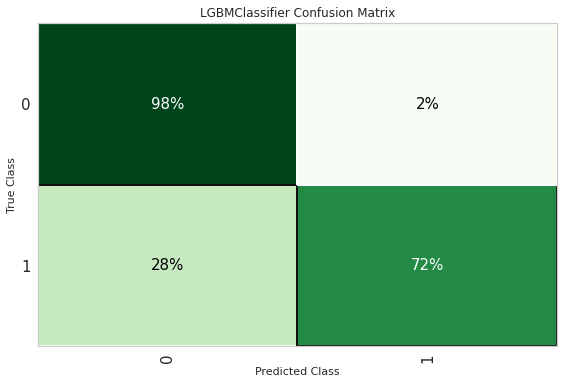

In [18]:
plot_model(lgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

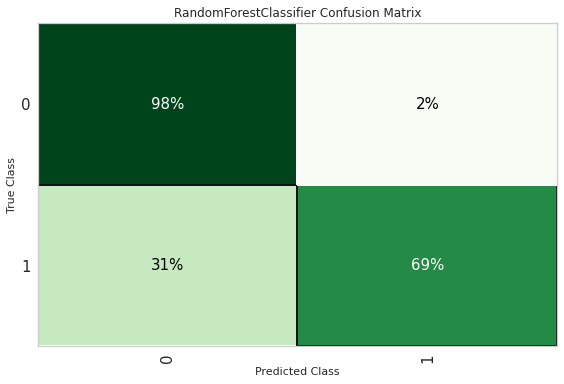

In [19]:
plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

### 5 Tuning the Models
When a model is created using the `create_model()` function it uses the default hyperparameters. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

> Note: `tune_model()` does not take a trained model object as an input. It instead requires a model name to be passed as an abbreviated string similar to how it is passed in `create_model()`. All other functions in pycaret.classification require a trained model object as an argument.

In [20]:
tuned_lgbm, tuner_0 = tune_model(lgbm, 
                            fold = 5,
                            optimize = 'F1', 
                            choose_better = True, 
                            return_tuner=True)

In [21]:
tuned_rf, tuner = tune_model(rf, 
                            fold = 5,
                            optimize = 'F1', 
                            choose_better = True, 
                            return_tuner=True)

### 5.1 Custom Tuning

While creating models using `create_model()` method, you can observe the model's cross validation training score. 

To observe, it you have set `return_train_score=True`, by default it is set to False
If False, returns the CV Validation scores only. If True, returns the CV training scores along with the CV validation scores. This is useful when the user wants to do bias-variance tradeoff. A high CV training score with a low corresponding CV validation score indicates overfitting.


We can change the searching strategy used for Hyperparameter tuning using the parameter `search_algorithm` 
* search_algorithm: str, default = None

The search algorithm depends on the `search_library` parameter. Some search algorithms require additional libraries to be installed. If None, will use search library-specific default algorithm.

> ‘scikit-learn’ possible values:
* ‘random’ : random grid search (default)
* ‘grid’ : grid search

> ‘scikit-optimize’ possible values:
* ‘bayesian’ : Bayesian search (default)

> ‘tune-sklearn’ possible values:
* ‘random’ : random grid search (default)
*  ‘grid’ : grid search
* ‘bayesian’ : pip install scikit-optimize
* ‘hyperopt’ : pip install hyperopt
* ‘optuna’ : pip install optuna
* ‘bohb’ : pip install hpbandster ConfigSpace

> ‘optuna’ possible values:
* ‘random’ : randomized search
* ‘tpe’ : Tree-structured Parzen Estimator search (default)

#### 5.1.1 Custom tuning using `Random-search`

In [26]:
#pip install scikit-optimize

In [25]:
tuned_lgbm_skopt,tuner_1 = tune_model(lgbm, 
                                   search_library = 'scikit-optimize',
                                   fold = 5 ,
                                   optimize = 'F1',
                                   choose_better = True, 
                                   return_tuner=True)

In [27]:
tuned_rf_skopt,tuner1 = tune_model(rf, 
                                   search_library = 'scikit-optimize',
                                   fold = 5 ,
                                   optimize = 'F1',
                                   choose_better = True, 
                                   return_tuner=True)

In [32]:
#pip install optuna

In [31]:
tuned_lgbm_optuna,tuner_2 = tune_model(lgbm, 
                                    search_library='optuna',
                                    search_algorithm='random',
                                    fold = 5,
                                    optimize = 'F1',
                                    choose_better=True,
                                    return_tuner=True)

In [33]:
tuned_rf_optuna,tuner2 = tune_model(rf, 
                                    search_library='optuna',
                                    search_algorithm='random',
                                    fold = 5,
                                    optimize = 'F1',
                                    choose_better=True,
                                    return_tuner=True)

Let's proceed with `tuned_lgbm_skopt` 

In [34]:
print(tuner_1)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('empty_step', 'passthrough'),
                                        ('actual_estimator',
                                         LGBMClassifier(boosting_type='gbdt',
                                                        class_weight=None,
                                                        colsample_bytree=1.0,
                                                        device='gpu',
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_c...
                             'actual_est

### 6 Analyzing the model performance


6.1 Learning Curve

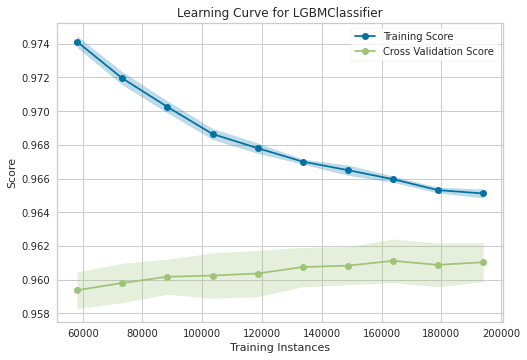

In [35]:
plot_model(tuned_lgbm_skopt, plot = 'learning')

6.2 AUC Curve

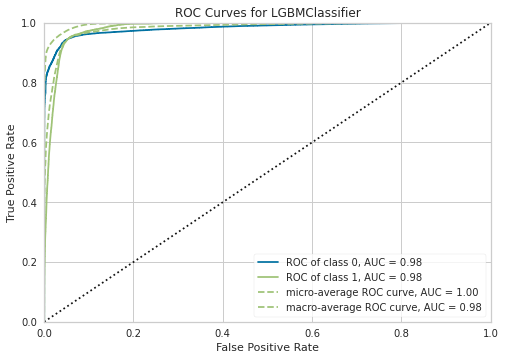

In [36]:
plot_model(tuned_lgbm_skopt, plot = 'auc')

6.3 Precision-recall Curve

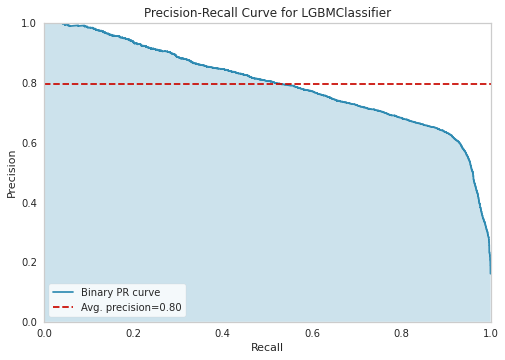

In [37]:
plot_model(tuned_lgbm_skopt, plot = 'pr')

6.4 Confusion Matrix

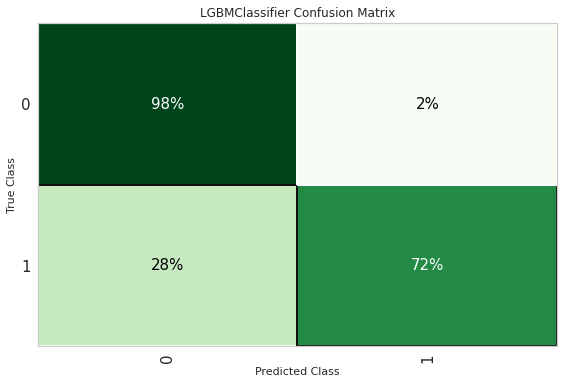

In [38]:
plot_model(tuned_lgbm_skopt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

6.5 Feature Importance

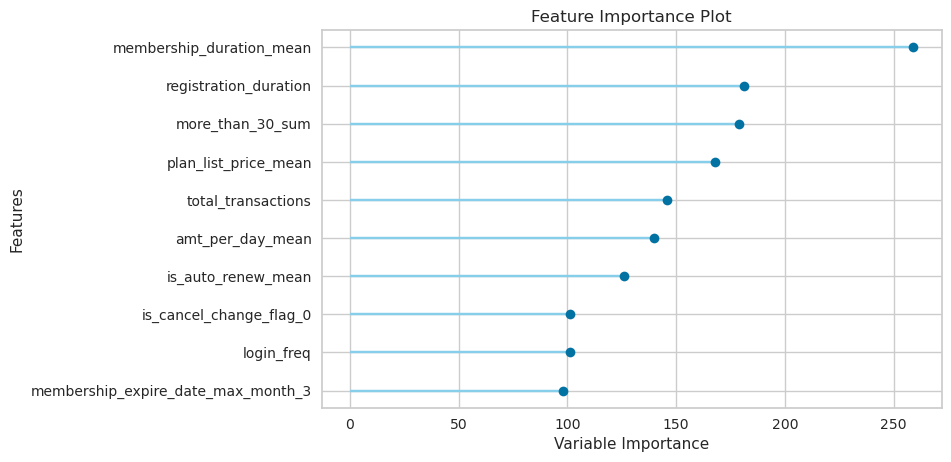

In [39]:
plot_model(tuned_lgbm_skopt, plot = 'feature')

6.6 Model Interpretaion

In [44]:
#pip install shap

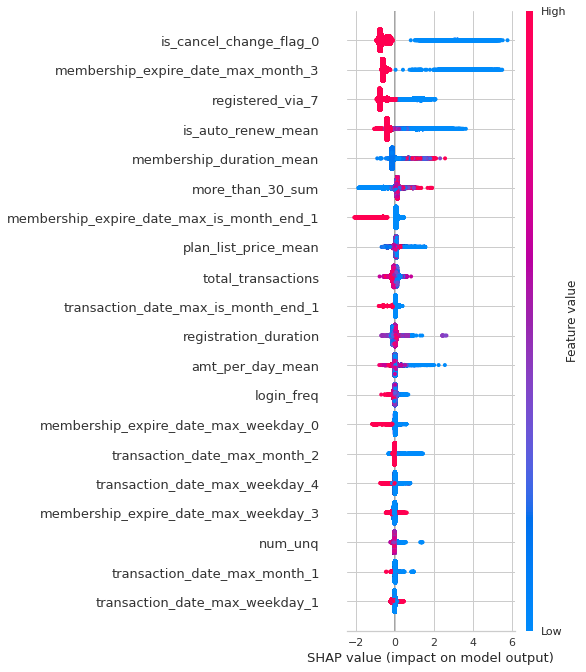

In [47]:
interpret_model(tuned_lgbm_skopt)

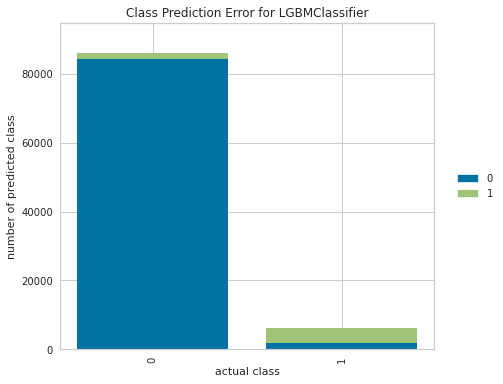

In [48]:
plot_model(tuned_lgbm_skopt, plot='error')

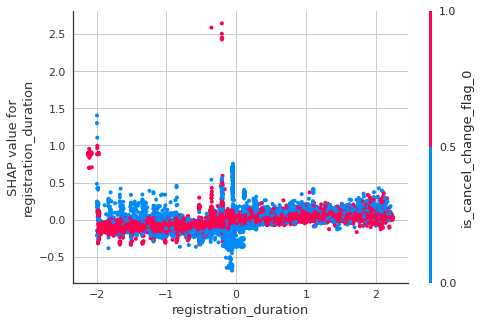

In [49]:
interpret_model(tuned_lgbm_skopt,plot='correlation',feature='registration_duration')

In [50]:
interpret_model(tuned_lgbm_skopt,plot='reason',observation=0) # index of observation in test data

In [ ]:
pip install interpret

  Using cached interpret-0.2.7-py3-none-any.whl (1.4 kB)
  Using cached interpret_core-0.2.7-py3-none-any.whl (6.6 MB)


### 7 Evaluating the model

In [43]:
predict_model(tuned_lgbm_skopt, data=data_unseen).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9625,0.9828,0.7439,0.7194,0.7314,0.7113,0.7114


,msno,city,bd,gender,registered_via,registration_init_time,is_churn,total_payment_channels,change_in_payment_methods,payment_plan_days_mean,...,num_75,num_985,num_100,num_unq,total_secs,login_freq,last_login,registration_duration,Label,Score
0,X1AmJaNJ1bpGEgxLveRwBhxGHytaIHHuNfAAPFKCFg4=,1,6.3,2,13,2016-12-27,0,3,1,30.0,...,0.934417,0.000000,3.230200,3.219675,9.070,4,2017-02-04,89,0,0.9978
1,5obk4z2LF+rxlMWfs6GSj7p1HyFUYCvrsO6itixJIxk=,22,33.0,1,9,2015-02-05,0,6,2,30.0,...,0.000000,0.000000,5.296980,2.029523,5.953,12,2017-01-16,773,0,0.9417
2,9eoVMtsXwWvmDtvBHzLTV5gegf59sdeuTvdbhnl77nk=,1,6.3,2,13,2016-12-27,0,3,1,30.0,...,0.000000,0.693147,1.758377,2.405943,7.695,4,2017-02-05,89,0,0.9977
3,E7AzsekzVHL4d4ropO9g6HOwXUfsfrdM6FINWb6xTbs=,11,28.0,0,4,2017-01-09,0,2,1,30.0,...,0.000000,0.000000,1.543446,1.931663,7.145,4,2017-02-17,63,0,0.9962
4,t2pAx7JJ+u9/tADRTYPb3EBqcDDk4M9JZIKG01FaagI=,5,28.0,0,4,2017-01-11,1,1,1,30.0,...,0.000000,0.173287,3.310596,3.338761,9.030,4,2017-01-22,34,1,0.7709
